Lista de Exercícios 1

* 01) Prova de 2007 - Questão 1

* 02) Prova de 2007 - Itens 2(a) e 2(b)

* 03) Lista de Exercícios 1 da CPE723 Edição Presencial - Exercício 3(a) (não é preciso fazer o item (b))

04) Prova de 2008 - Questão 1

05) Prova de 2011 - Questão 1

06) Prova de 2012 - Itens 1(a), 1(b) e 1(c)

07) Lista de Exercícios 1 da CPE723 Edição Presencial - Exercício 4(a) (de novo, não é preciso fazer o item (b), cálculo manual com 10 valores)

08) Lista de Exercícios 1 da CPE723 Edição Presencial - Exercício 5

09) Prova de 2008 - Questão 3

#  1) Prova 2007 - Questão 1 a) 



Seja $x_n$ o valor de $x$ na interação de índice $n$. Temos então que:

$$x_1 = 0.9501$$
$$x_2 = 0.2311$$
$$x_3 = 0.6068$$

In [13]:
x = [0.9501, 0.2311, 0.6068]

Como a PDF tem densidade uniforme, a operação em cada iteração é a própria função $x^3$ somada com as parcelas das iterações anteriores:

In [14]:
y = []
for n in range(1, 4):
    yn = 0
    for i in range(1, n+1):
        yn = yn + x[i-1]**3
    y.append(yn/n)
    print("Resultado da iteração " + str(n) + ": " + str(y[n-1]))
    


Resultado da iteração 1: 0.8576457785009999
Resultado da iteração 2: 0.43499409236599995
Resultado da iteração 3: 0.3644719103879999


Podemos calcular também a aproximação utilizando um número grande de iterações:

In [15]:
import numpy as np

n = 10**6;
x = np.random.rand(n,1);
y = sum(x**3)/n;

print("Resultado da aproximação: " + str(y))
print("Resultado ideal: 0.25")

Resultado da aproximação: [0.24985167]
Resultado ideal: 0.25


#  1) Prova 2007 - Questão 1 b) 

Com uma densidade exponencial foi utilizada, podemos escrever:

$$\int_0^1x^2e^{-x}dx = \int_0^1x^2f_{x}(x)dx$$

Como o intervalo da integral é de 0 a 1, os valores aleatórios fora desse intervalo serão descartados (nesse caso, o valor de $x_2 = 1.4647$). Assim, temos as seguintes iterações:

In [16]:
x = [0.0512, 1.4647, 0.4995, 0.7216]
y = []
for n in range(1, len(x)+1):
    yn = 0
    for i in range(1, n+1):
        if x[i-1] < 1:
            yn = yn + x[i-1]**2
    y.append(yn/n)
    print("Resultado da iteração " + str(n) + ": " + str(y[n-1]))

Resultado da iteração 1: 0.00262144
Resultado da iteração 2: 0.00131072
Resultado da iteração 3: 0.08404056333333333
Resultado da iteração 4: 0.19320706250000003


Podemos calcular também a aproximação utilizando um número grande de iterações:

In [17]:
n = 10**6;
x = np.random.exponential(1, (n,1));
y = sum(x[x < 1]**2)/n;

print("Resultado da aproximação: " + str(y))
print("Resultado ideal: 0.1607")

Resultado da aproximação: 0.16067307863695204
Resultado ideal: 0.1607


#  2) Prova 2007 - Questão 2 b) e c)

Temos que a distribuição de Boltzmann é tal que:

$$\Large p_i = \alpha e^{\frac{-J(x)}{kT}}$$

Um algorítimo para gerar essa distribuição é o algorítmimo de Metropolis modificado. As modificações são:

* A função custo é a mesma dada pelo enunciado
* A troca de estado de x depende de um número aleatório discreto que pode valer -1 ou 1
* Os estados são limitados entre 1 e 5

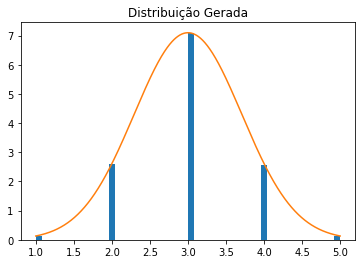

In [38]:
import random
import math
import matplotlib.pyplot as plt

x = 1
xs = []
N = 1e5
k = 1
T = 1

def J(x):
    return (x - 3)**2

for n in range(1, int(N)):
    xhat = x + random.randint(-1, 1)
    if xhat > 5:
        xhat = 1
    elif xhat < 1:
        xhat = 5
        
    dJ = J(xhat) - J(x)
    q = math.exp(-dJ/(k*T))
    r = random.uniform(0, 1)
    
    a = 1
    if r > q:
        a = 0
    
    if dJ < 0:
        x = xhat
    else:
        x = (1-a)*x + a*xhat
    
    if n > N*0.9:
        xs.append(x)

plt.hist(xs, bins=50, density=True)
X = np.linspace(1, 5, num=1000)
plt.plot(X, np.exp(-J(X))*7.1)
plt.title("Distribuição Gerada")
plt.show()

# 03) Lista de Exercícios 1 da CPE723 Edição Presencial - Exercício 3(a)

Podemos utilizar o algorítmo de Metropolis sem modificções. Similar ao programa da questão anterior temos:

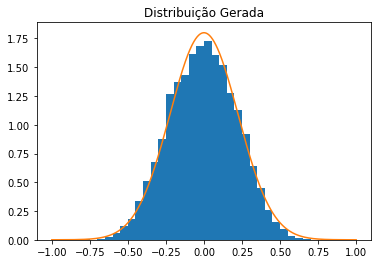

In [135]:
import random
import math
import matplotlib.pyplot as plt

x = 1
xs = []
N = 1e5
eps = 0.1
k = 1
T = 0.1

def J(x):
    return (x)**2

for n in range(1, int(N)):
    xhat = x + eps*random.uniform(-1, 1)
        
    dJ = J(xhat) - J(x)
    q = math.exp(-dJ/(k*T))
    r = random.uniform(0, 1)
    
    a = 1
    if r > q:
        a = 0
    
    if dJ < 0:
        x = xhat
    else:
        x = (1-a)*x + a*xhat
    
    if n > N*0.9:
        xs.append(x)

plt.hist(xs, np.arange(-1, 1, 0.05), density=True)
X = np.linspace(-1, 1, num=1000)
plt.plot(X, np.exp(-J(X)/T)*1.8)
plt.title("Distribuição Gerada")
plt.show()

# 04) Prova de 2008 - Questão 1

A densidade de probabilidade $P$ gerada pelo algorítmo de metropolis é tal que:

$$\large P = \alpha e^{-J(x)/T}$$

Queremos que:

$$\large f_{X}(x) = \alpha e^{-J(x)/T}$$

Logo:

$$\large \ln (f_{X}(x)) = \ln(\alpha) -J(x)/T$$

$$\large J(x) = -T\ln (f_{X}(x)) -T\ln(\alpha)$$

Como o algorítmo utiliza uma diferença de valores de $J(x)$ ($\delta J(x)$) podemos remover o termo constante:

$$\large J(x) = -T\ln(f_{X}(x))$$

A seguir, o algorítimo de Metropolis em questão que gera uma densidade de probabilidade arbitrária fX(x):

<ipython-input-165-34836f274fb7>:16: RuntimeWarning: divide by zero encountered in log
  return -T*np.log(fX(x))


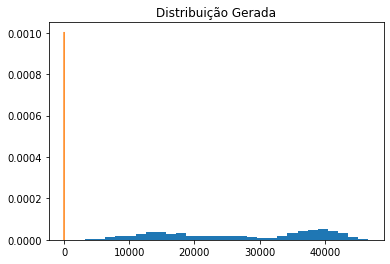

In [165]:
import random
import math
import matplotlib.pyplot as plt

x = 0
xs = []
N = 1e5
eps = 100
k = 1
T = 1

def fX(x):
    return x**2

def J(x):
    return -T*np.log(fX(x))

for n in range(1, int(N)):
    xhat = x + eps*(random.randint(0, 1)*2 -1)
        
    dJ = J(xhat) - J(x)
    q = math.exp(-dJ/(k*T))
    r = random.uniform(0, 1)
    
    a = 1
    if r > q:
        a = 0
    
    if dJ < 0:
        x = xhat
    else:
        x = (1-a)*x + a*xhat
    
    if n > N*0:
        xs.append(x)

plt.hist(xs,bins=30, density=True)
X = np.linspace(0, 10, num=50)
#plt.plot(X, fX(X))
plt.title("Distribuição Gerada")
plt.show()

# 5) Prova de 2011 - Questão 1

Como a integral só apresenta termos $x_1$ e $x_2$, para que a integral seja calculada, basta calcular as integrais intermediárias em um intervalo $0 \leq x_n < 1$ e multiplicar o resultado final por 2. A integral pode ser calculada pelo método de Monte Carlo, que por sua vez, permite calcular o valor experado de uma dada deinsidade de probabilidades $f_{X}(x)$. Podemos então escolher $f_{X}(x)$ tal que:

$$\large f_{X_1, X_2} = e^{-(x_1^2 + x_2^2)}$$



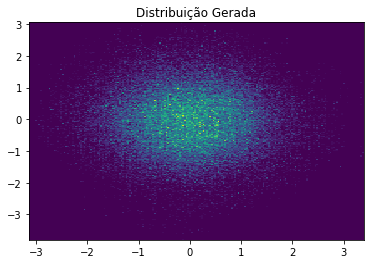

Resultado da aproximação: 0.8281197961033341
Resultado esperado: 3.6731


In [14]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

x = [0, 0]
xs1 = []
xs2 = []
N = 1e6
eps = 0.5
xhat = [0, 0]
Z = 0
k = 1
T = 1

# Metropolis

def J(x):
    return x[0]**2 + x[1]**2

for n in range(1, int(N)):
    i = random.randint(0,1)
    xhat[i] = x[i] + eps*random.uniform(-1, 1)
        
    dJ = J(xhat) - J(x)
    
    q = math.exp(-dJ/(k*T))
    Z += q
    r = random.uniform(0, 1)
    
    a = 1
    if r > q:
        a = 0
    
    if dJ < 0:
        x[0] = xhat[0]
        x[1] = xhat[1]
    else:
        x[0] = (1-a)*x[0] + a*xhat[0]
        x[1] = (1-a)*x[1] + a*xhat[1]
    
    if n > N*0.9:
        xs1.append(x[0])
        xs2.append(x[1])

plt.hist2d(xs1, xs2, bins = 200)
plt.title("Distribuição Gerada")
plt.show()

# Monte Carlo

xarray1 = np.array(xs1)
xarray2 = np.array(xs2)

y = 4*2*(sum(xarray1[xarray1 < 1]**2) + sum(xarray1[xarray1 < 1]**2))/Z;

print("Resultado da aproximação: " + str(y))
print("Resultado esperado: 3.6731")

# 06) Prova de 2012 - Itens 1(a), 1(b) e 1(c)